<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/Exercises%20%26%20Solutions/Week2_Supervised_Learning_and_K_Nearest_Neighbors_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

***All italic notes and student's code written by Moshe Mann.***

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not?

  *I think these are NOT good features,<br> because these features don't influence customer churn.* 

We will not be using them, so they can be dropped from the data.

In [9]:
import pandas as pd

# Import the data using the file path
filepath = 'https://raw.githubusercontent.com/mannmoshe/machine-learning/main/Data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

In [10]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [12]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [14]:
data[['intl_plan', 'voice_mail_plan', 'churned']].head()

,intl_plan,voice_mail_plan,churned
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [15]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [16]:
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [17]:
# Split the data into two dataframes
X_data = data.iloc[:,:-1]
y_data = data['churned']


In [18]:
X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [19]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [21]:
y_data.values[10:20],y_pred[10:20]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [22]:
# Function to calculate the % of values that were correctly predicted
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [23]:
print(accuracy(y_data, y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [24]:
#Student writes code here

In [25]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

1.0


*The distance method weight points by the inverse of their distance, the closest point has the biggest weight.<br> We got 100% accuracy because the model holds the original y value ("churned" column) for every point (there is no train-test split), the y value of the point itself get the highest weight.*

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

0.9456


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [27]:
#Student writes code here

In [28]:
results = {}

for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k, p=2)
  knn = knn.fit(X_data, y_data)

  y_pred = knn.predict(X_data)

  results[k] = accuracy(y_data, y_pred)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

*Helpful: [plot dict](https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356), [set x values](https://stackoverflow.com/questions/44813601/how-to-set-x-axis-values-in-matplotlib-python).*

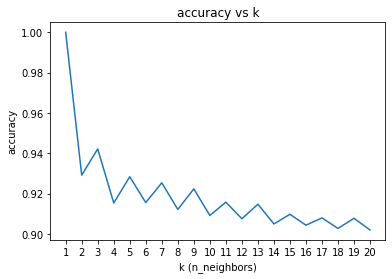

In [30]:
lists = sorted(results.items())
x, y = zip(*lists)
xi = list(range(1, len(x)+1))
plt.xticks(xi, x)
plt.plot(x, y)
plt.xlabel('k (n_neighbors)')
plt.ylabel('accuracy') 
plt.title('accuracy vs k')
plt.show()

*We got 100% accuracy because the model holds the original y value ("churned" column) for every point (there is no train-test split), Only one neighbour means the y value of the point itself.*

# Now with Iris

Load, shuffle and split Iris data (Lesson 1)
... don´t forget scaling features

In [47]:
import numpy as np
import pandas as pd

filepath = 'https://raw.githubusercontent.com/mannmoshe/machine-learning/main/Data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.columns,data.shape)
data

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


X = frames, 
y = target

In [53]:
y = data['species']
X = data.iloc[:,:-1]

In [54]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns], 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: specie

In [55]:
np.std(X)

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.75)

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37, 4), (37,), (113, 4), (113,))

In [58]:
X_train,y_train

(     sepal_length  sepal_width  petal_length  petal_width
 31            5.4          3.4           1.5          0.4
 43            5.0          3.5           1.6          0.6
 83            6.0          2.7           5.1          1.6
 79            5.7          2.6           3.5          1.0
 108           6.7          2.5           5.8          1.8
 14            5.8          4.0           1.2          0.2
 138           6.0          3.0           4.8          1.8
 50            7.0          3.2           4.7          1.4
 10            5.4          3.7           1.5          0.2
 125           7.2          3.2           6.0          1.8
 135           7.7          3.0           6.1          2.3
 34            4.9          3.1           1.5          0.1
 25            5.0          3.0           1.6          0.2
 144           6.7          3.3           5.7          2.5
 95            5.7          3.0           4.2          1.2
 56            6.3          3.3           4.7          1

Train a k-NN classifier on the training data, test on the testing data, explore different settings, number of input features, accuracies, ..., compare with colleagues, write conclusions

In [38]:
#Student writes code here

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy(y_test, y_pred))

0.9026548672566371
